# Thư viện sử dụng

In [53]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

In [54]:
#  Check khoảng cách giữa các điểm 
def is_too_close(new_point, existing_points, min_distance):
    for point in existing_points:
        dist = np.sqrt((new_point[0] - point[0]) ** 2 + (new_point[1] - point[1]) ** 2)
        if dist < min_distance:
            return True
    return False

# Counting


In [55]:
# Hàm đếm đối tượng bằng template matching
def counting(img, template, THRESHOLD, min_distance=20, font_scale=1.0):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    w, h = template.shape[1], template.shape[0]
    res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
    
    loc = np.where(res >= THRESHOLD)
    detected_points = []
    
    # Lọc và đánh dấu đối tượng
    for idx, (y, x) in enumerate(zip(loc[0], loc[1])):
        # Kiểm tra khoảng cách với các điểm đã phát hiện
        if not is_too_close((x, y), detected_points, min_distance):
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            # Thêm số thứ tự
            cv2.putText(img, str(len(detected_points) + 1), (x, y - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 255, 0), 2, cv2.LINE_AA)
            detected_points.append((x, y)) # Lưu tọa độ đã phát hiện
    

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Detected {len(detected_points)} objects")
    plt.show()

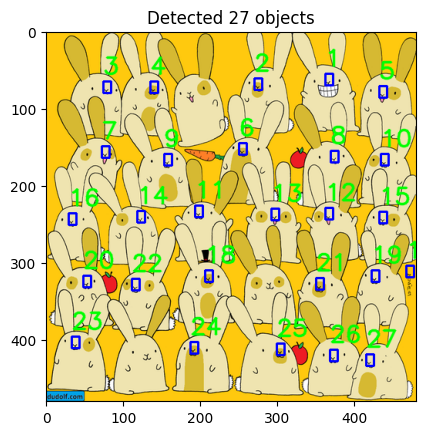

In [64]:
# Load images
img = cv2.imread('Counting/rabbit2.png')
template = cv2.imread('Counting/rabbit2_template.jpg')

counting(img, template, THRESHOLD=0.62, min_distance=32, font_scale=1)
